In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# importamos los datos
df = pd.read_csv('data/rfm_doc_unicos.csv',sep =",")

In [59]:
df.head()

,document_number,frecuencia,recencia,money
0,000005678,1,180,2900.00
1,00000BS96,1,2,263.00
2,00000S942,1,217,212.96
3,00001BG93,1,33,315.44
4,00002926,2,23,2577.22


In [60]:
df.count()

document_number    231974
frecuencia         231974
recencia           231974
money              231974
dtype: int64

In [61]:
variables = ['frecuencia','recencia','money']
rfm = df[variables]

In [6]:
rfm.head()

,frecuencia,recencia,money
0,1,180,2900.00
1,1,2,263.00
2,1,217,212.96
3,1,33,315.44
4,2,23,2577.22


Segmentacion

## Kmeans

In [7]:
from sklearn.cluster import KMeans
import numpy as np

### scale values

In [62]:
# Calculamos el importe monetario medio para cada cliente
rfm['money_avg'] = rfm.money / rfm.frecuencia

In [63]:
rfm.head()

,frecuencia,recencia,money,money_avg
0,1,180,2900.00,2900.00
1,1,2,263.00,263.00
2,1,217,212.96,212.96
3,1,33,315.44,315.44
4,2,23,2577.22,1288.61


In [64]:
# Reemplazamos los NaN (que se producen por dividir 0 entre 0)
where_are_NaNs = np.isnan(rfm)
rfm[where_are_NaNs] = 0

In [65]:
# Elimino un outlier de monetario
rfm = rfm[rfm['money_avg']<50000]

In [66]:
# Calculamos la media y la desviación de cada variable para normalizar los datos
mean_freq = rfm.frecuencia.mean()
std_freq = rfm.frecuencia.std()
mean_rec = rfm.recencia.mean()
std_rec = rfm.recencia.std()
mean_mon = rfm.money_avg.mean()
std_mon = rfm.money_avg.std()

In [67]:
rfm_normalizada = (rfm.frecuencia - mean_freq)/std_freq

In [68]:
rfm_normalizada = rfm_normalizada.to_frame()

In [69]:
rfm_normalizada['recencia'] = (rfm.recencia - mean_rec)/std_rec
rfm_normalizada['money'] = (rfm.money_avg - mean_mon)/std_mon

In [70]:
rfm_normalizada.head()

,frecuencia,recencia,money
0,-0.291924,0.085925,3.851704
1,-0.291924,-1.299602,-0.304955
2,-0.291924,0.373928,-0.383832
3,-0.291924,-1.058302,-0.222294
4,0.820642,-1.136141,1.311697


In [71]:
# Creamos un objeto de tipo KMeans
kmeans = KMeans(n_clusters = 4)

In [72]:
# le indicamos que ajuste y prediga
clusters = kmeans.fit_predict(rfm_normalizada)

In [73]:
# añadimos a cada registro el cluster al que pertenece
rfm_normalizada['cluster'] = clusters

In [74]:
# añadimos a rfm los clusters a los que pertenece cada cliente
rfm['cluster'] = rfm_normalizada['cluster']

In [80]:
# exportamos los datos para poder trabajar siempre con los mismos
#rfm.to_csv("/home/dsc/shared_with_win/segmentacion.csv")

In [75]:
rfm.head()

,frecuencia,recencia,money,money_avg,cluster
0,1,180,2900.00,2900.00,2
1,1,2,263.00,263.00,1
2,1,217,212.96,212.96,0
3,1,33,315.44,315.44,1
4,2,23,2577.22,1288.61,1


## Graficado de la segmentación

In [76]:
%matplotlib inline

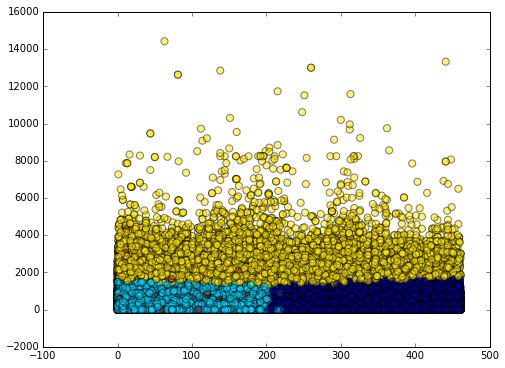

In [77]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(rfm['recencia'],rfm['money_avg'],alpha = 0.5,c=rfm['cluster'],s=50,
            ) # nube de puntos a opacidad 0.1 ya que tenemos casi 1.5MM de puntos
plt.show()

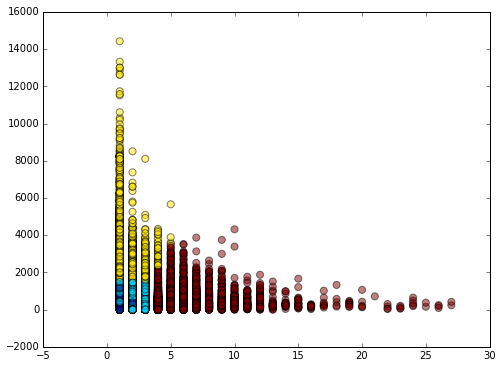

In [78]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(rfm['frecuencia'],rfm['money_avg'],alpha = 0.5,c=rfm['cluster'],s=50,
            ) # nube de puntos a opacidad 0.1 ya que tenemos casi 1.5MM de puntos
plt.show()

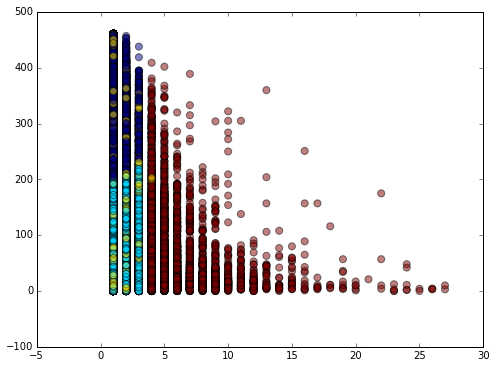

In [79]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(rfm['frecuencia'],rfm['recencia'],alpha = 0.5,c=rfm['cluster'],s=50,
            ) # nube de puntos a opacidad 0.1 ya que tenemos casi 1.5MM de puntos
plt.show()